In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

### fucntion ####

In [32]:
### graph 함수 ###
def sel_graph():
    fig , axes = plt.subplots(nrows=3, ncols=1)
    fig.patch.set_facecolor('xkcd:white')
    fig.set_size_inches(9,7);
    plt.subplots_adjust(hspace=0.7)

    ### 총 근로 시간 그래프
    sns.barplot(x='나이구분', y='값', data=new_df.loc[new_df['고용형태'] == '총근로시간 (시간)'], hue='날짜', ax=axes[0],
                palette='RdBu', width=0.6)  # 색상 지정
    axes[0].set(title='총근로시간 (시간)', ylabel='근로시간(시간)', xlabel='연령대')
    axes[0].grid()

    # 각 막대에 값을 표시하는 로직
    for p in axes[0].patches:
        height = p.get_height()
        axes[0].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                         textcoords='offset points')
    # 범례 위치 조정
    max_value = new_df.loc[new_df['고용형태'] == '총근로시간 (시간)', '값'].max() * 1.5
    axes[0].set_ylim(0, max_value)
    axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))


    ### 월 급여 그래프 ###
    sns.barplot(x='나이구분', y='값', data=new_df.loc[new_df['고용형태'] == '월급여액 (천원)'], hue='날짜', ax=axes[1],
                palette='RdBu', width=0.8)  # 색상 지정
    axes[1].set(title='월급여액 (천원)', ylabel='월급여액 (천원)', xlabel='연령대')
    axes[1].grid()


    # 각 막대에 값을 표시하는 로직
    for p in axes[1].patches:
        height = p.get_height()
        axes[1].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')
    # 범례 위치 조정
    max_value = new_df.loc[new_df['고용형태'] == '월급여액 (천원)', '값'].max() * 1.5
    axes[1].set_ylim(0, max_value)
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


    ### 월 급여 그래프 ###
    sns.barplot(x='나이구분', y='값', data=new_df.loc[new_df['고용형태'] == '시간당임금총액 (원)'], hue='날짜', ax=axes[2],
                palette='RdBu', width=0.8)  # 색상 지정
    axes[2].set(title='시간당임금총액 (원)', ylabel='시간당임금총액 (원)', xlabel='연령대')
    axes[2].grid()

    # 각 막대에 값을 표시하는 로직
    for p in axes[2].patches:
        height = p.get_height()
        axes[2].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')
    # 범례 위치 조정
    max_value = new_df.loc[new_df['고용형태'] == '시간당임금총액 (원)', '값'].max() * 1.5
    axes[2].set_ylim(0, max_value)
    axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    
    
    pass


#### 연령별_임금_및_근로시간_20240211163926

In [3]:
df = pd.read_csv('./연령별_임금_및_근로시간_20240211163926.csv', encoding='cp949')

In [4]:
df.head(5)

,고용형태,연령,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,...,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11,2022.12
0,고용형태,연령,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),...,초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원)
1,전체근로자,전체,20.8,164.2,157.2,6.9,1.7,19806,17931,3271,...,7.5,2.2,22651,20308,3526,3172,2992,180,355,4255
2,전체근로자,29세이하,19.8,155.0,148.0,7.0,1.5,14230,13289,2265,...,7.7,2.0,16248,14999,2471,2302,2144,158,169,2027
3,전체근로자,30~39세,21.5,174.3,165.7,8.6,2.0,20185,17987,3487,...,8.9,2.4,22986,20236,3710,3296,3086,209,414,4966
4,전체근로자,40~49세,21.3,169.9,162.6,7.3,1.8,22699,20207,3853,...,8.1,2.3,26272,23062,4195,3696,3485,211,499,5992


In [5]:
fil_list = ['고용형태', '전체근로자', '정규근로자', '비정규근로자']
df_fil = df.loc[df['고용형태'].isin(fil_list)]

In [6]:
df_fil_t=df_fil.T
re_columns  = df_fil_t.iloc[0].values

rename_dict = dict()
for idx, value in zip(df_fil_t.columns, re_columns):
    rename_dict[idx] = value

df_fil_t = df_fil_t.rename(columns = rename_dict)
df_fil_t = df_fil_t.iloc[1:]
df_fil_t = df_fil_t.reset_index()
df_fil_t.iloc[0,0] = '날짜'
df_fil_t = df_fil_t.rename(columns={'index':'날짜'})

### 전체만 구분 ###

In [49]:
df_fil_t_total = df_fil_t.iloc[:,:8]
# df_fil_t_total = pd.DataFrame(df_fil_t_total.unstack())
df_fil_t_total.columns = df_fil_t_total.iloc[0].values
df_fil_t_total = df_fil_t_total.iloc[1:]
df_fil_t_total = df_fil_t_total.rename(columns={'연령':'고용형태'})
# df_fil_t_total['날짜'] = pd.to_datetime(df_fil_t_total['날짜'])

## type 변경 ##
df_fil_t_total['날짜'] = df_fil_t_total['날짜'].map(lambda val:val.split(".")[0])
df_fil_t_total['전체'] = df_fil_t_total['전체'].map(lambda val:np.round(float(val),0))
df_fil_t_total['29세이하'] = df_fil_t_total['29세이하'].map(lambda val:np.round(float(val),0))
df_fil_t_total['30~39세'] = df_fil_t_total['30~39세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['40~49세'] = df_fil_t_total['40~49세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['50~59세'] = df_fil_t_total['50~59세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['60세이상'] = df_fil_t_total['60세이상'].map(lambda val:np.round(float(val),0))
df_fil_t_total['날짜'] = df_fil_t_total['날짜'].map(lambda val:val.split(".")[0])
# df_fil_t_total = df_fil_t_total.set_index('날짜')
df_fil_t_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      26 non-null     object 
 1   고용형태    26 non-null     object 
 2   전체      26 non-null     float64
 3   29세이하   26 non-null     float64
 4   30~39세  26 non-null     float64
 5   40~49세  26 non-null     float64
 6   50~59세  26 non-null     float64
 7   60세이상   26 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.8+ KB


##### 형태 변경

In [50]:
# 나이 컬럼 추출
ages = df_fil_t_total.columns[2:]

# 나이와 나이구분을 포함한 데이터프레임 생성
new_df = pd.DataFrame()

for age in ages:
    temp_df = df_fil_t_total[['날짜', '고용형태', age]].copy()
    temp_df=temp_df.rename(columns={age: '값'})
    temp_df['나이구분'] = age
    new_df = pd.concat([new_df, temp_df])



In [51]:
new_df

,날짜,고용형태,값,나이구분
1,2021,총근로일수 (일),21.0,전체
2,2021,총근로시간 (시간),164.0,전체
3,2021,소정실근로시간 (시간),157.0,전체
4,2021,초과근로시간 (시간),7.0,전체
5,2021,휴일근로시간 (시간),2.0,전체
...,...,...,...,...
22,2022,월급여액 (천원),2547.0,60세이상
23,2022,정액급여 (천원),2463.0,60세이상
24,2022,초과급여 (천원),84.0,60세이상
25,2022,전년도 연간특별급여/12개월 (천원),98.0,60세이상


In [47]:
new_df.to_csv('./연령별_임금_및_근로시간_전체근로자.csv', index=False, encoding='utf-8-sig')

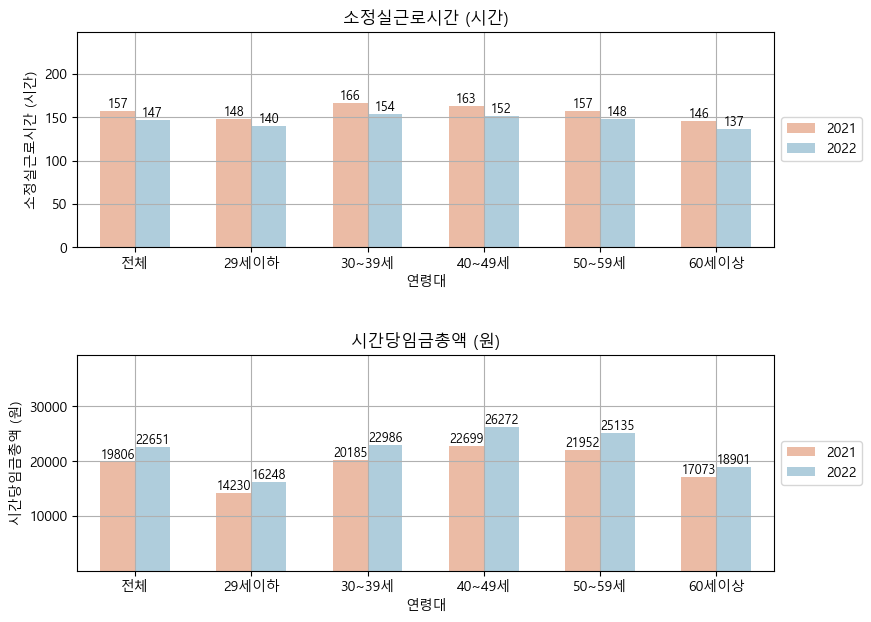

In [72]:
select_cols=['소정실근로시간 (시간)', '시간당임금총액 (원)']


fig , axes = plt.subplots(nrows=len(select_cols), ncols=1)
fig.patch.set_facecolor('xkcd:white')
fig.set_size_inches(9,7);
plt.subplots_adjust(hspace=0.5)

for idx,col in enumerate(select_cols):
    
    ### 총 근로 시간 그래프
    sns.barplot(x='나이구분', y='값', data=new_df.loc[new_df['고용형태'] == f'{col}'], hue='날짜', ax=axes[idx],
                palette='RdBu', width=0.6)  # 색상 지정
    axes[idx].set(title=f'{col}', ylabel=f'{col}', xlabel='연령대')
    axes[idx].grid()
    
    # 각 막대에 값을 표시하는 로직
    for p in axes[idx].patches:
        height = p.get_height()
        axes[idx].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                         textcoords='offset points')
    # 범례 위치 조정
    max_value = new_df.loc[new_df['고용형태'] == f'{col}', '값'].max() * 1.5
    axes[idx].set_ylim(idx, max_value)
    axes[idx].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    

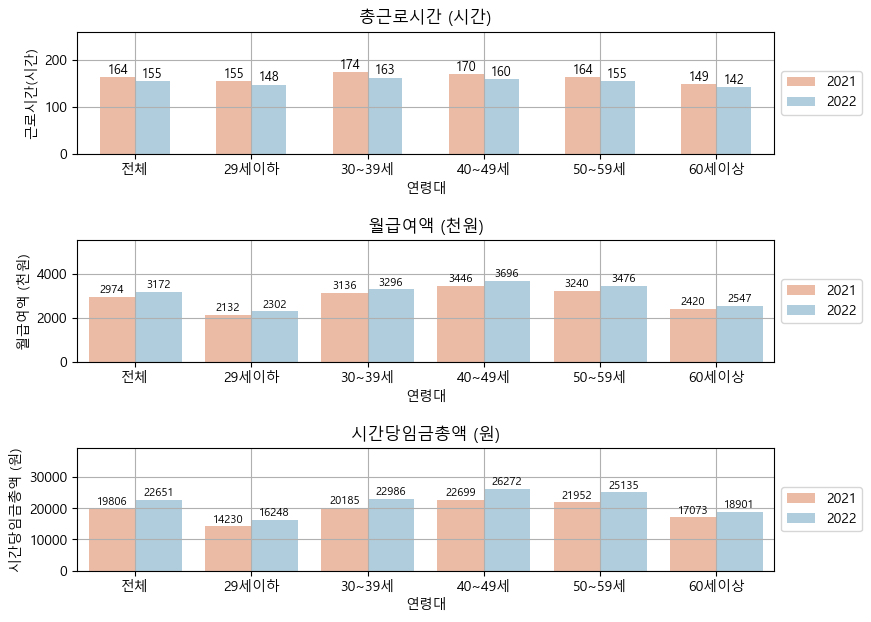

In [59]:
fig , axes = plt.subplots(nrows=3, ncols=1)
fig.patch.set_facecolor('xkcd:white')
fig.set_size_inches(9,7);
plt.subplots_adjust(hspace=0.7)

### 총 근로 시간 그래프
sns.barplot(x='나이구분', y='값', data=new_df.loc[new_df['고용형태'] == '총근로시간 (시간)'], hue='날짜', ax=axes[0],
            palette='RdBu', width=0.6)  # 색상 지정
axes[0].set(title='총근로시간 (시간)', ylabel='근로시간(시간)', xlabel='연령대')
axes[0].grid()

# 각 막대에 값을 표시하는 로직
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
# 범례 위치 조정
max_value = new_df.loc[new_df['고용형태'] == '총근로시간 (시간)', '값'].max() * 1.5
axes[0].set_ylim(0, max_value)
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))


### 월 급여 그래프 ###
sns.barplot(x='나이구분', y='값', data=new_df.loc[new_df['고용형태'] == '월급여액 (천원)'], hue='날짜', ax=axes[1],
            palette='RdBu', width=0.8)  # 색상 지정
axes[1].set(title='월급여액 (천원)', ylabel='월급여액 (천원)', xlabel='연령대')
axes[1].grid()


# 각 막대에 값을 표시하는 로직
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                     textcoords='offset points')
# 범례 위치 조정
max_value = new_df.loc[new_df['고용형태'] == '월급여액 (천원)', '값'].max() * 1.5
axes[1].set_ylim(0, max_value)
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


### 월 급여 그래프 ###
sns.barplot(x='나이구분', y='값', data=new_df.loc[new_df['고용형태'] == '시간당임금총액 (원)'], hue='날짜', ax=axes[2],
            palette='RdBu', width=0.8)  # 색상 지정
axes[2].set(title='시간당임금총액 (원)', ylabel='시간당임금총액 (원)', xlabel='연령대')
axes[2].grid()

# 각 막대에 값을 표시하는 로직
for p in axes[2].patches:
    height = p.get_height()
    axes[2].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                     textcoords='offset points')
# 범례 위치 조정
max_value = new_df.loc[new_df['고용형태'] == '시간당임금총액 (원)', '값'].max() * 1.5
axes[2].set_ylim(0, max_value)
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [61]:
df_fil_t_total['고용형태'].unique()

array(['총근로일수 (일)', '총근로시간 (시간)', '소정실근로시간 (시간)', '초과근로시간 (시간)',
       '휴일근로시간 (시간)', '시간당임금총액 (원)', '시간당정액급여 (원)', '월임금총액 (천원)',
       '월급여액 (천원)', '정액급여 (천원)', '초과급여 (천원)', '전년도 연간특별급여/12개월 (천원)',
       '전년도 연간특별급여 (천원)'], dtype=object)

### 정규 근로자

In [87]:
df_fil_t_total=df_fil_t.iloc[:,[0,1,8,9,10,11,12,13]]

df_fil_t_total.columns = df_fil_t_total.iloc[0].values
df_fil_t_total = df_fil_t_total.iloc[1:]
df_fil_t_total = df_fil_t_total.rename(columns={'연령':'고용형태'})
# df_fil_t_total['날짜'] = pd.to_datetime(df_fil_t_total['날짜'])

## type 변경 ##
df_fil_t_total['날짜'] = df_fil_t_total['날짜'].map(lambda val:val.split(".")[0])
df_fil_t_total['전체'] = df_fil_t_total['전체'].map(lambda val:np.round(float(val),0))
df_fil_t_total['29세이하'] = df_fil_t_total['29세이하'].map(lambda val:np.round(float(val),0))
df_fil_t_total['30~39세'] = df_fil_t_total['30~39세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['40~49세'] = df_fil_t_total['40~49세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['50~59세'] = df_fil_t_total['50~59세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['60세이상'] = df_fil_t_total['60세이상'].map(lambda val:np.round(float(val),0))
df_fil_t_total['날짜'] = df_fil_t_total['날짜'].map(lambda val:val.split(".")[0])
# df_fil_t_total = df_fil_t_total.set_index('날짜')
df_fil_t_total.info()

# 나이 컬럼 추출
ages = df_fil_t_total.columns[2:]

# 나이와 나이구분을 포함한 데이터프레임 생성
new_df = pd.DataFrame()

for age in ages:
    temp_df = df_fil_t_total[['날짜', '고용형태', age]].copy()
    temp_df=temp_df.rename(columns={age: '값'})
    temp_df['나이구분'] = age
    new_df = pd.concat([new_df, temp_df])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      26 non-null     object 
 1   고용형태    26 non-null     object 
 2   전체      26 non-null     float64
 3   29세이하   26 non-null     float64
 4   30~39세  26 non-null     float64
 5   40~49세  26 non-null     float64
 6   50~59세  26 non-null     float64
 7   60세이상   26 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.8+ KB


In [89]:
new_df.to_csv('./연령별_임금_및_근로시간_정규근로자.csv', index=False, encoding='utf-8-sig')

### 비정규 근로자 ###

In [95]:
df_fil_t_total=df_fil_t.iloc[:,[0,1,14,15,16,17,18,19]]

df_fil_t_total.columns = df_fil_t_total.iloc[0].values
df_fil_t_total = df_fil_t_total.iloc[1:]
df_fil_t_total = df_fil_t_total.rename(columns={'연령':'고용형태'})
# df_fil_t_total['날짜'] = pd.to_datetime(df_fil_t_total['날짜'])

## type 변경 ##
df_fil_t_total['날짜'] = df_fil_t_total['날짜'].map(lambda val:val.split(".")[0])
df_fil_t_total['전체'] = df_fil_t_total['전체'].map(lambda val:np.round(float(val),0))
df_fil_t_total['29세이하'] = df_fil_t_total['29세이하'].map(lambda val:np.round(float(val),0))
df_fil_t_total['30~39세'] = df_fil_t_total['30~39세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['40~49세'] = df_fil_t_total['40~49세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['50~59세'] = df_fil_t_total['50~59세'].map(lambda val:np.round(float(val),0))
df_fil_t_total['60세이상'] = df_fil_t_total['60세이상'].map(lambda val:np.round(float(val),0))
df_fil_t_total['날짜'] = df_fil_t_total['날짜'].map(lambda val:val.split(".")[0])
# df_fil_t_total = df_fil_t_total.set_index('날짜')
df_fil_t_total.info()

# 나이 컬럼 추출
ages = df_fil_t_total.columns[2:]

# 나이와 나이구분을 포함한 데이터프레임 생성
new_df = pd.DataFrame()

for age in ages:
    temp_df = df_fil_t_total[['날짜', '고용형태', age]].copy()
    temp_df=temp_df.rename(columns={age: '값'})
    temp_df['나이구분'] = age
    new_df = pd.concat([new_df, temp_df])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      26 non-null     object 
 1   고용형태    26 non-null     object 
 2   전체      26 non-null     float64
 3   29세이하   26 non-null     float64
 4   30~39세  26 non-null     float64
 5   40~49세  26 non-null     float64
 6   50~59세  26 non-null     float64
 7   60세이상   26 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.8+ KB


In [96]:
new_df.to_csv('./연령별_임금_및_근로시간_비정규근로자.csv', index=False, encoding='utf-8-sig')

### 비정규 근로자